# Customer analysis
### This dataset contains customer information that will be used to enhance outreach and discover business opportunities. The objetive of the analysis is to understand customer demographics and buying behavior.

In [3]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm
from scipy import stats #para box-cox entre otros
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [9]:
data = pd.read_csv('marketing_customer_analysis.csv')
data.head ()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Data Preprocessing

In [7]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
data.shape

(9134, 24)

In [5]:
# Checking for missing values
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [8]:
# Checking descriptive statistics
data.describe ()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### Exploratory Data Analysis

In [16]:
# New dataframes with differentiated variables.

X_num = data.select_dtypes(include=np.number)
X_cat = data.select_dtypes(include=object)

In [17]:
X_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [18]:
# Data normalization

# Application of normalization to column X_num
transformer = Normalizer().fit(X_num)

# Utilization of the fitted transformer. It is saved in variable X_normalized.
x_normalized = transformer.transform(X_num)

# Normalization visualization
print(x_normalized.shape)
x_normalized = pd.DataFrame(x_normalized, columns = X_num.columns)
x_normalized

(9134, 8)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.049048,0.998772,0.001225,0.000568,0.000089,0.000000,0.000018,0.006830
1,0.987006,0.000000,0.013293,0.001838,0.005939,0.000000,0.001131,0.160005
2,0.255478,0.966747,0.002141,0.000357,0.000753,0.000000,0.000040,0.011230
3,0.997473,0.000000,0.013829,0.002348,0.008480,0.000000,0.000913,0.069128
4,0.064055,0.997940,0.001662,0.000273,0.001002,0.000000,0.000023,0.003145
...,...,...,...,...,...,...,...,...
9129,0.309385,0.950932,0.000965,0.000238,0.001176,0.000000,0.000026,0.002620
9130,0.141858,0.989727,0.003619,0.000641,0.001283,0.000000,0.000046,0.017372
9131,0.995277,0.000000,0.010363,0.001097,0.004511,0.000366,0.000244,0.096406
9132,0.324247,0.945493,0.004137,0.001465,0.000129,0.000000,0.000129,0.029786


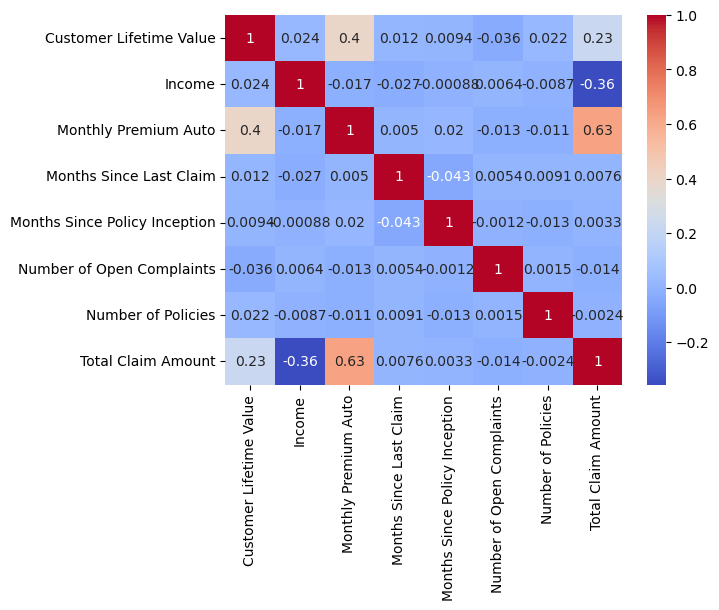

In [20]:
# Correlation Matrix
correlation_matrix = X_num.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### One Hot/Label Encoding (categorical).

In [14]:
# Encoding of categorical variables using this method. 
# This method constructs a matrix with binary data (0 y 1). 
# The value of 1 indicates the membership of the column to the category.

X_cat = X_cat.drop(['Customer'], axis = 1)
X_cat = X_cat.drop(['Effective To Date'], axis = 1)

In [15]:
# I obtain dummy variables using the library OneHotEncoder

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop="first").fit(X_cat)
encoder.categories_
encoded = encoder.transform(X_cat).toarray()
encoded

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

In [36]:
# Select object columns in the DataFrame
X_cat = X_cat.select_dtypes(include = object)

# Create an instance of the OneHotEncoder with drop='first' to drop the first column of each dummy variable
encoder = OneHotEncoder(handle_unknown='error', drop='first')

# Fit the encoder to the categorical data
encoder.fit(X_cat)

# Transform the categorical data into dummy variables
encoded = encoder.transform(X_cat).toarray()

# Get the feature names of the encoded variables
feature_names = encoder.get_feature_names_out(X_cat.columns)

# Convert the encoded array to a DataFrame with column names
X_cat_encoded = pd.DataFrame(encoded, columns=feature_names)

# Drop the original categorical columns from the original DataFrame
X_cat = X_cat.drop(X_cat.columns, axis=1)

# Concatenate the encoded DataFrame with the original DataFrame
X_cat = pd.concat([X_cat, X_cat_encoded], axis=1)

# Visualization of code
X_cat

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Merging numerical and categorical data
matriz = pd.concat((x_normalized, X_cat), axis=1)
matriz = pd.DataFrame (matriz)

In [38]:
X_cat

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

Y = matriz ['Total Claim Amount']
X = matriz.drop(['Total Claim Amount'], axis = 1)

# Train-Test Split

In [40]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.5, random_state=42)
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
r2_score(y_test, predictions)

0.8676016034909563

# Apply linear regression.

In [41]:
dfpred = pd.DataFrame(columns=[y_test, predictions]).T
dfpred

,
Total Claim Amount,
0.002926,0.000519
0.018761,0.031677
0.004750,0.006295
0.004585,-0.003364
0.018757,0.008726
...,...
0.016263,0.028583
0.177525,0.163434
0.005699,0.000151


# Interpreting the results of a train-test of a linear regression model.
## MSE, RMSE, R2, ADJ R2

In [22]:
import math
from sklearn.metrics import mean_squared_error

# Mean Squared Error:  
mse = mean_squared_error(y_test, predictions) #varianza
print ('Variance: ', mse)

# Root Mean Squared Error
rmse = math.sqrt(mse) #error estándar
print ('Standard deviation: ', rmse)

# Coefficient of determination.
r2 = r2_score (y_test, predictions) 
# Values ranging from 0 to 1, where a value closer to 1 indicates a better fit.
print('R2: ',r2)

n = len(X_test) # Likewise, R-squared, but it penalizes the inclusion of independent variables that do not contribute to the model. 
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
print (adj_r2)

NameError: name 'y_test' is not defined

# Train test 0.2:
##### Variance:  0.0004890478324095332
##### Standard deviation:  0.022114425889213883
##### R2:  0.8549065251829603
##### 0.850821686364913

# Train test 0.5:

### Variance:  0.0004123831859450294
### Standard deviation:  0.02030722004472866
### R2:  0.8676016034909563
### 0.8661357222187127

The results in both cases are similar, although when using a 0.5 train-test split, the R-squared is higher. This indicates that using more data to train the model leads to a more consistent result. However, this can also "overfit" the model, as it limits its estimation capacity and makes it more resistant to changes in the data.